#TITANIC SURVIVAL PREDICTION


IMPORTING LIBRARIES

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


LOADING DATASET

In [18]:
df = pd.read_csv(r"C:\Users\Shriya\Downloads\archive (1)\Titanic-Dataset.c")
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

CHECKING MISSING VALUES

In [31]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


HANDLING MISSING VALUES

In [38]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

COUNTING THE SURVIVALS

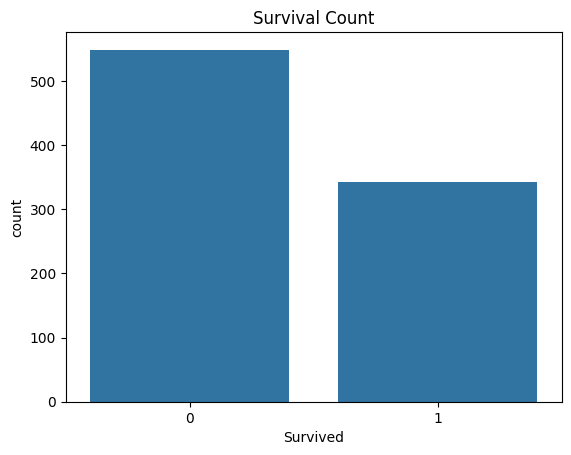

In [32]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

ANALYSING THE NUMBER OF SURVIVALS ACCORDING TO GENDER

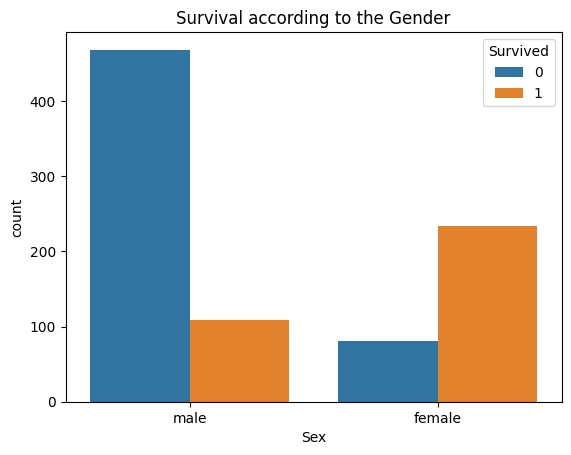

In [33]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival according to the Gender")
plt.show()


ANALYSING THE NUMBER OF SURVIVALS ACCORDING TO CLASS

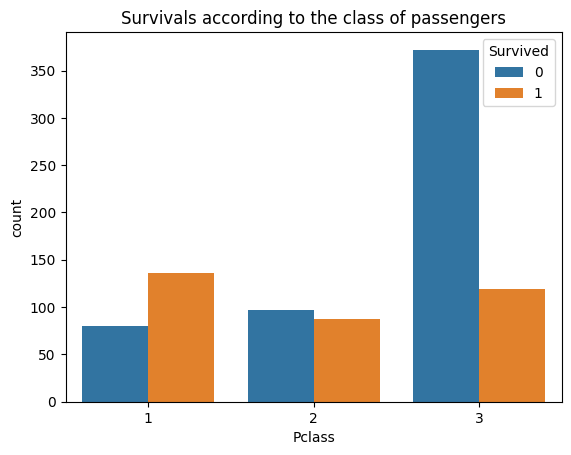

In [34]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survivals according to the class of passengers")
plt.show()

DATA CLEANING AND PREPARATION

In [35]:
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [39]:
le= LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])

In [47]:
X=df.drop("Survived", axis=1)
y=df["Survived"]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

TRAINING THE MODEL

In [50]:
model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

EVALUATION THE MODEL


Accuracy: 0.8100558659217877


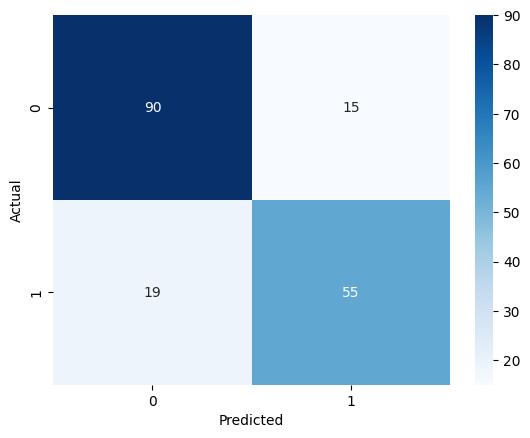

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))